
# BDA300/Assignment 
## Bank Marketing  Case Study
### Data cleaning and preparation
The head of Marketing wants to know which customers have the highest propensity for buying a Certificate of Deposit (CD) from the institution. 


#### Total : 170 pts


### 1. Data loading [20pts]

    a. Load customer_demographics into a dataframe. [5pts]
    Lowercase all column names. [4pts]
    show the first 5 rows and the list of columns and their types.[1pt]

In [50]:
import pandas as pd
import numpy as np
customer_demographics = pd.read_csv('customer_demographics.csv')
customer_demographics.head()

,Education,customer_id,AGE,marital,JOB
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


In [51]:
customer_demographics.columns = customer_demographics.columns.str.lower()

In [52]:
customer_demographics.head(5)

,education,customer_id,age,marital,job
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


In [119]:
customer_demographics.dtypes

education       object
customer_id      int64
age            float64
marital         object
job             object
dtype: object

    b. Load customer_banking_info into a dataframe. [5pts]
    change the column name customer_id1 to customer_id. [4pts]
    show the first 5 rows and the list of columns and their types.[1pt]

In [120]:
customer_banking = pd.read_csv('customer_banking_info.csv')
customer_banking.head()

,customer_id1,default,balance,housing,loan
0,122482,no,347,no,no
1,119725,no,3462,no,no
2,103490,no,157,yes,no
3,126218,no,3689,yes,no
4,104835,no,0,yes,yes


In [121]:
customer_banking.rename(columns={'customer_id1':'customer_id'},inplace=True)
customer_banking.head(5)

,customer_id,default,balance,housing,loan
0,122482,no,347,no,no
1,119725,no,3462,no,no
2,103490,no,157,yes,no
3,126218,no,3689,yes,no
4,104835,no,0,yes,yes


In [122]:
customer_banking.dtypes

customer_id     int64
default        object
balance         int64
housing        object
loan           object
dtype: object

### 2. Merging [10pts]

    a. Merge the two dataframes into one unified dataframe named bank. [5pts]
    show the first 5 rows of the new dataframe and the column names and their types. 
    b. show the first 5 rows of the new dataframe and the column names and their types. [2pts]
    c. Save the merged dataframe into a csv file and name it customer_demo_bankinfo.csv. [3pts]
    

In [123]:
bank = pd.merge(customer_demographics,customer_banking,on='customer_id')
bank.head()

,education,customer_id,age,marital,job,default,balance,housing,loan
0,secondary,100103,33.0,married,entrepreneur,no,2,yes,yes
1,tertiary,100106,35.0,married,management,no,231,yes,no
2,primary,100118,57.0,married,blue-collar,no,52,yes,no
3,primary,100119,60.0,married,retired,no,60,yes,no
4,secondary,100121,28.0,married,blue-collar,no,723,yes,yes


In [124]:
bank.head(5)


,education,customer_id,age,marital,job,default,balance,housing,loan
0,secondary,100103,33.0,married,entrepreneur,no,2,yes,yes
1,tertiary,100106,35.0,married,management,no,231,yes,no
2,primary,100118,57.0,married,blue-collar,no,52,yes,no
3,primary,100119,60.0,married,retired,no,60,yes,no
4,secondary,100121,28.0,married,blue-collar,no,723,yes,yes


In [125]:
bank.dtypes

education       object
customer_id      int64
age            float64
marital         object
job             object
default         object
balance          int64
housing         object
loan            object
dtype: object

In [126]:
bank.to_csv('customer_demo_bankinfo.csv')

### 3. Categorical variables [15pts]

#### 3.1. Examine the variable 'marital'. [10pts]

    a. lowercase all values under marital column. [5pts] 
    show the frequency table before and after the change. 
    b. save the frequency table for marital into a dataframe, then create a pie plot for marital. [5pts] 
    ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
    

In [127]:
bank['marital'].value_counts(dropna=False)

married     5942
single      3393
divorced    1185
DIVORCED      58
Name: marital, dtype: int64

In [128]:
bank['marital'] = bank['marital'].str.lower()
bank['marital'].value_counts(dropna=False)

married     5942
single      3393
divorced    1243
Name: marital, dtype: int64

In [129]:
marital_freq = pd.DataFrame(bank['marital'].value_counts(dropna=False))
marital_freq

,marital
married,5942
single,3393
divorced,1243


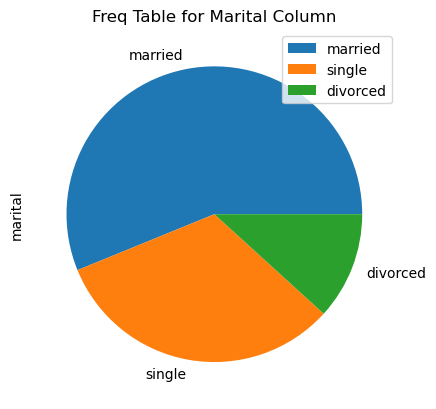

In [130]:
import matplotlib.pyplot as plt
marital_freq.plot.pie(y= 'marital')
plt.title('Freq Table for Marital Column')
plt.show()

#### 3.2. Examine the variable "Job". [5pts] 

    a. write a code to combine the categories "admin." and "ADMINISTRATION" for the job column as "admin". replace any occurrence of "ADMINISTRATION" or "admin." with "admin". [5pts]
    b. show the frequency table for the job column before and after the change. 

In [131]:
bank['job'].value_counts(dropna=False)

management        2391
blue-collar       1914
technician        1768
admin.            1134
services           850
retired            757
student            375
self-employed      367
unemployed         353
entrepreneur       291
housemaid          262
unknown             65
ADMINISTRATION      51
Name: job, dtype: int64

In [132]:
bank['job'] = bank['job'].replace(["admin.","ADMINISTRATION"],"admin")

In [133]:
bank['job'].value_counts(dropna=False)

management       2391
blue-collar      1914
technician       1768
admin            1185
services          850
retired           757
student           375
self-employed     367
unemployed        353
entrepreneur      291
housemaid         262
unknown            65
Name: job, dtype: int64

### 4. Numerical variables [45pts]

##### <b>  4.1. Examine the age variable [15pts]

    a. show the basic statistics for the age variable and the skewness value. use df.colname.skew(). [5pts]
    b. show the histogram and qq plot for the age variable. is the age variable skewed? [5pts] 
    c. perform a log2 transformation for the age variable. show the histogram and qq plot and skewness value. is the log2 transformation normally distributed? [5pts]

In [134]:
bank['age'].describe()

count    10558.000000
mean        41.264160
std         12.148345
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max        146.000000
Name: age, dtype: float64

In [135]:
bank.age.skew()

1.008184106102808

Text(0.5, 1.0, 'Histogram for Age Column Count')

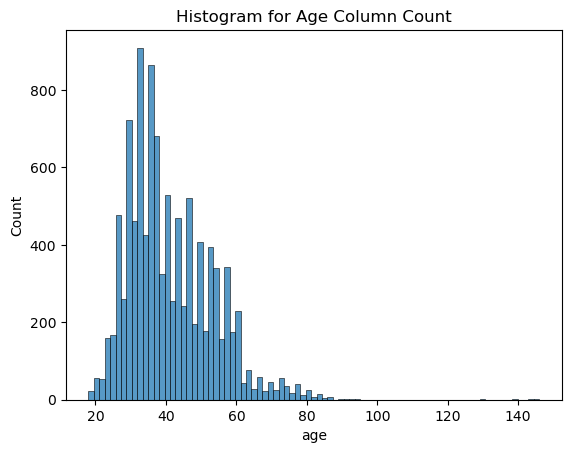

In [152]:
import seaborn as sns
sns.histplot(bank['age'])
plt.title("Histogram for Age Column Count")


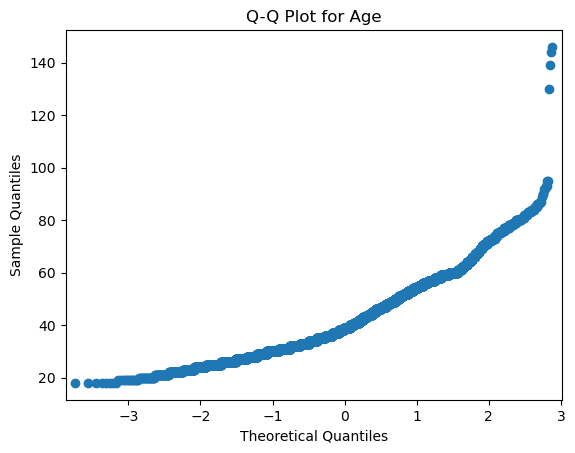

In [154]:
import statsmodels.api as spc
spc.qqplot(bank['age'])
plt.title("Q-Q Plot for Age")
plt.show()

In [146]:
# Yes the variable is skewed. 
#The age variable is rigth skewed because it has positive skewness.
#The majority of customers fall within the approximate age range of 20 to 55.
#However, the presence of high-value outliers causes the mean to exceed the median.

In [148]:
bank['age_log2'] = np.log2(bank['age'])
bank['age_log2'].head()

0    5.044394
1    5.129283
2    5.832890
3    5.906891
4    4.807355
Name: age_log2, dtype: float64

In [149]:
bank['age_log2'].skew()

0.21438373418355325

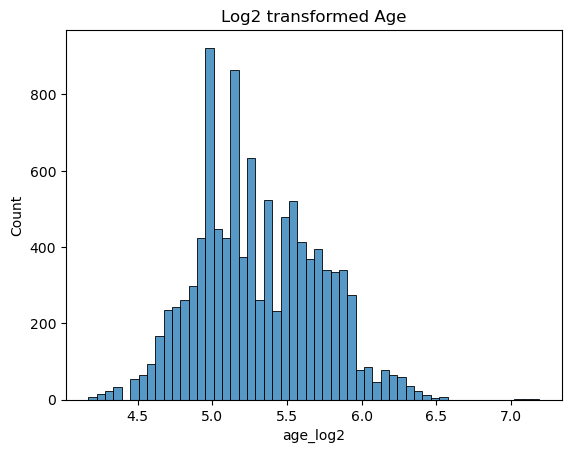

In [157]:
sns.histplot(bank['age_log2'])
plt.title('Log2 transformed Age')
plt.show()

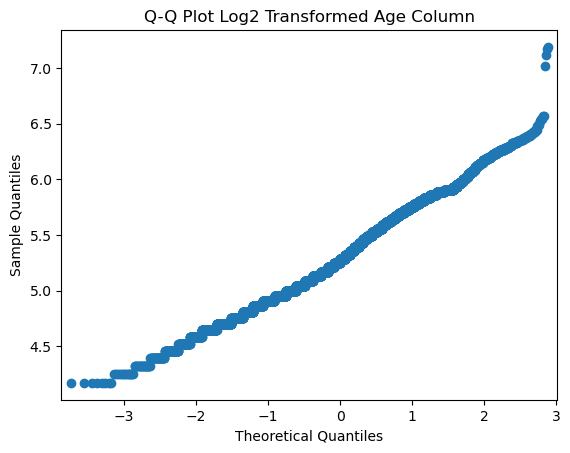

In [158]:
spc.qqplot(np.log2(bank['age']))
plt.title('Q-Q Plot Log2 Transformed Age Column')
plt.show()

In [ ]:
#The skewness value being close to zero indicates that the distribution is 
#slightly positively skewed but nearly symmetrical. This observation is supported by
#the nearly symmetrical appearance of the histogram. The Q-Q plot further suggests that 
#the age variable's distribution is mildly positively skewed and close to normal. 
#This analysis concludes that applying the log2 transformation to the age variable
#effectively made the distribution almost symmetric. The log2 transformation reduces
#the influence of outliers by compressing larger values.

##### <b> 4.2. Missing values [20pts]

    a. show the number of missing values for each variable in the bank dataframe. 5pts
    b. show the avg age for each job category. 5pts
    c. add a new column to the dataframe name 'age_imputed' for replacing the missing values under the age columns with the average age given the job. 5pts
    d. show rows with age null and all columns including age_imputed. 5pts

In [40]:
bank.isnull().sum()

education       0
customer_id     0
age            20
marital         0
job             0
default         0
balance         0
housing         0
loan            0
dtype: int64

In [41]:
bank.groupby('job')['age'].mean()

job
ADMINISTRATION    37.274510
admin.            39.335097
blue-collar       39.691099
entrepreneur      42.448276
housemaid         47.547893
management        40.116709
retired           64.896962
self-employed     39.307902
services          38.504717
student           25.920000
technician        39.416431
unemployed        41.116147
unknown           47.123077
Name: age, dtype: float64

In [159]:
bank['age_imputed'] = bank.groupby(['job'])['age'].transform(lambda grp: grp.fillna(grp.mean()))

In [160]:
bank[bank['age'].isnull()]

,education,customer_id,age,marital,job,default,balance,housing,loan,age_log2,age_imputed
119,tertiary,100898,NaN,married,management,no,305,yes,no,NaN,40.116709
592,tertiary,103782,NaN,married,technician,no,94,yes,yes,NaN,39.416431
784,primary,104872,NaN,married,blue-collar,no,5,yes,no,NaN,39.691099
1383,primary,108581,NaN,married,blue-collar,no,572,yes,yes,NaN,39.691099
2129,SECONDARY,112972,NaN,married,technician,no,-241,yes,yes,NaN,39.416431
2190,SECONDARY,113317,NaN,divorced,housemaid,no,188,no,no,NaN,47.547893
2506,tertiary,114933,NaN,married,blue-collar,no,597,no,no,NaN,39.691099
2549,primary,115167,NaN,married,management,no,3760,no,yes,NaN,40.116709
2977,SECONDARY,117338,NaN,divorced,services,no,293,yes,yes,NaN,38.504717
3989,tertiary,122821,NaN,single,management,no,0,no,no,NaN,40.116709


##### <b> 4.3. Outlier detection [10pts] </b>

    a. Show the box plot for the balance variable. 2pts
    b. show the upper and lower fence for the balance variable. [3pts] 
    c. remove the outliers for the balance variable. [5pts] 
    

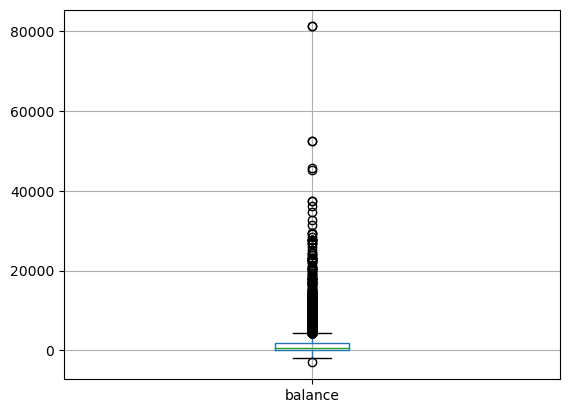

In [161]:
bank.boxplot(column='balance')
plt.show()

In [162]:
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print('Lower Fence: ', lower_fence)
print('Upper Fence: ', upper_fence)

Lower Fence:  -2335.0
Upper Fence:  4225.0


In [164]:
outliers = bank[(bank['balance'] < lower_fence) | (bank['balance'] > upper_fence)]
outliers

,education,customer_id,age,marital,job,default,balance,housing,loan,age_log2,age_imputed
70,unknown,100547,39.0,single,technician,no,45248,yes,no,5.285402,39.0
85,secondary,100670,28.0,single,services,no,5090,yes,no,4.807355,28.0
182,tertiary,101314,31.0,single,management,no,7444,yes,yes,4.954196,31.0
184,secondary,101330,36.0,married,technician,no,5611,yes,no,5.169925,36.0
187,secondary,101342,29.0,married,blue-collar,no,5903,yes,no,4.857981,29.0
...,...,...,...,...,...,...,...,...,...,...,...
10513,tertiary,145198,61.0,married,self-employed,no,10861,no,no,5.930737,61.0
10532,secondary,145231,33.0,married,technician,no,5083,no,no,5.044394,33.0
10549,tertiary,145265,35.0,married,services,no,4655,no,no,5.129283,35.0
10559,tertiary,145286,60.0,married,services,no,4256,yes,no,5.906891,60.0


In [166]:
# df after removing outliers
bank = bank[(bank['balance']>= lower_fence) & (bank['balance'] <= upper_fence)]

In [167]:
bank['balance']

0           2
1         231
2          52
3          60
4         723
         ... 
10572     113
10573    2850
10574     505
10575     825
10576    1729
Name: balance, Length: 9593, dtype: int64

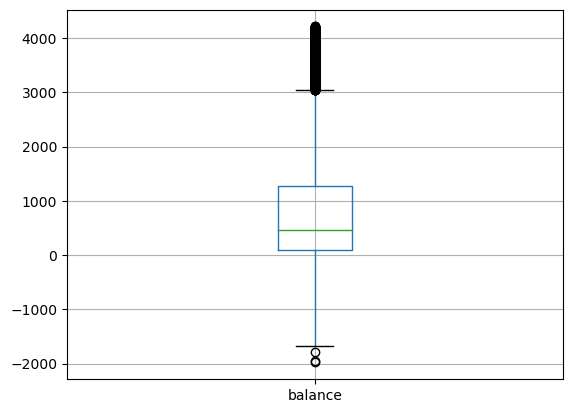

In [168]:
bank.boxplot(column='balance')
plt.show()

### 5. Variable correlation study [30pts]

##### <b> 5.1. Balance and loan. [15pts]

    a. create an equal sized binning for the balance variable. show the freq table. [5pts] 
    b. show the cross table between balance and loan. perform the chi-2 test. [5pts] 
    c. interpret the cross table and the chi-2 value. do people with loan have a positive balance? is there a relationship between the two variables? [5pts]
    

In [169]:
bank_binned = pd.DataFrame()
bank_binned['balance'] = pd.qcut(bank['balance'], q=4, precision=1, duplicates='drop')
bank_binned.value_counts()

balance         
(-1980.1, 97.0]     2405
(1276.0, 4216.0]    2397
(455.0, 1276.0]     2396
(97.0, 455.0]       2395
dtype: int64

In [170]:
bank_binned

,balance
0,"(-1980.1, 97.0]"
1,"(97.0, 455.0]"
2,"(-1980.1, 97.0]"
3,"(-1980.1, 97.0]"
4,"(455.0, 1276.0]"
...,...
10572,"(97.0, 455.0]"
10573,"(1276.0, 4216.0]"
10574,"(455.0, 1276.0]"
10575,"(455.0, 1276.0]"


In [171]:
balance_loan_crosstable = pd.crosstab(bank_binned['balance'], bank['loan'])
balance_loan_crosstable

loan,no,yes
balance,,
"(-1980.1, 97.0]",1913,492
"(97.0, 455.0]",2059,336
"(455.0, 1276.0]",2123,273
"(1276.0, 4216.0]",2180,217


In [172]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(balance_loan_crosstable.values)
print(chi2, p)

147.2942469008011 1.0102123147472865e-31


In [ ]:
#Given the very low p-value and high chi-squared value, it is evident that there is a
#significant relationship between balance and loan status. Individuals with personal 
#loans generally have lower balances compared to those without loans. While it is true 
#that people with loans can have positive balances, comparing balance brackets based on
#the loan status (yes/no) reveals that the proportion of individuals without loans and
#a positive balance is considerably higher than that of individuals with loans who
#also have a positive balance.

##### <b> 5.2. visual plots [15pts]

    a. subset the bank dataframe for balance between 0 and 2000 into balance2000 dataframe. [5pts]
    b. show colored scatter plot of balance and age from the balance2000 colored based on loan. [5pts]
    c. subset the bank dataframe into bank_loanyes and bankloanno then show density plots for both. use df.colname.plot.density() 5pts  


In [173]:
balance2000 = bank[(bank['balance'] >= 0) & (bank['balance'] <= 2000)]
balance2000

,education,customer_id,age,marital,job,default,balance,housing,loan,age_log2,age_imputed
0,secondary,100103,33.0,married,entrepreneur,no,2,yes,yes,5.044394,33.0
1,tertiary,100106,35.0,married,management,no,231,yes,no,5.129283,35.0
2,primary,100118,57.0,married,blue-collar,no,52,yes,no,5.832890,57.0
3,primary,100119,60.0,married,retired,no,60,yes,no,5.906891,60.0
4,secondary,100121,28.0,married,blue-collar,no,723,yes,yes,4.807355,28.0
...,...,...,...,...,...,...,...,...,...,...,...
10571,secondary,145303,34.0,single,admin,no,557,no,no,5.087463,34.0
10572,tertiary,145304,23.0,single,student,no,113,no,no,4.523562,23.0
10574,secondary,145306,25.0,single,technician,no,505,no,yes,4.643856,25.0
10575,tertiary,145307,51.0,married,technician,no,825,no,no,5.672425,51.0


<Axes: xlabel='age', ylabel='balance'>

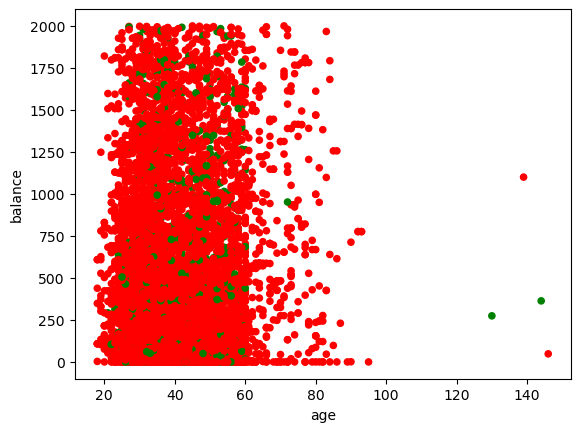

In [177]:
palette = {'yes': 'Green',
           'no': 'Red'}

colors = [palette[c] for c in balance2000['loan']]
balance2000.plot(kind= 'scatter',
                 x = 'age',
                 y = 'balance',
                 c = colors)



In [178]:
bankloanyes = bank[bank.loan == 'yes']
bankloanno = bank[bank.loan == 'no']

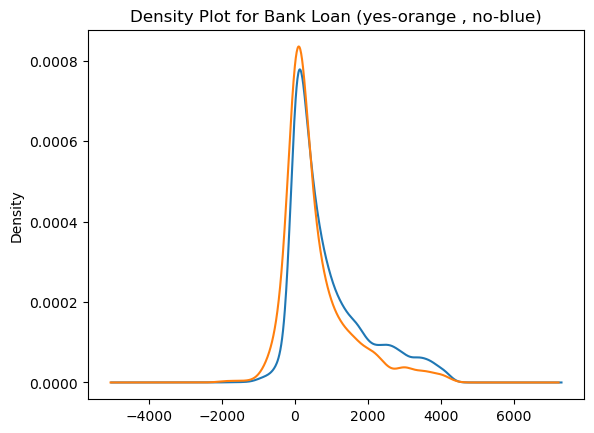

In [190]:
bankloanno.balance.plot.density()
bankloanyes.balance.plot.density()
plt.title("Density Plot for Bank Loan (yes-orange , no-blue)")
plt.show()

### 6. apply, split-apply-combine [50pts] 

##### 6.1. add dummy variables [10pts]

    a. lowercase the education column and replace unknown with secondary. 5pts
    b. add a new column named secondary that takes the value 1 if education value is 'secondary' and 0 otherwise. [5pts] use apply and lambda to create this new column, 5pts 
    c. show the frequency table for secondary column.

In [191]:
bank['education'].value_counts()

secondary    4572
tertiary     3049
primary      1312
unknown       411
SECONDARY     249
Name: education, dtype: int64

In [192]:
bank['education'] = bank['education'].str.lower()
bank.loc[bank['education']== 'unknown', 'education'] = 'secondary'
bank['education'].value_counts()

secondary    5232
tertiary     3049
primary      1312
Name: education, dtype: int64

In [193]:
bank['secondary'] = bank['education'].apply(lambda x: 1 if x == 'secondary' else 0 )
bank['secondary'].value_counts()

1    5232
0    4361
Name: secondary, dtype: int64

##### 6.2. apply functions [15pts]

    a. define a function named custom_binning that is defined with x, th1 and th2 and assigns <=th1 if the value x is in less than or equal th1, [th1 th2] if the value x falls in the [th1 th2] bin and >=th2 if the value of x is greater than or equal th2. 10pts 
    b. apply the function on age with th1=30, th2=50. Show the frequency table. 5pts

In [194]:
def custom_binning(x, th1, th2):
    if x <= th1:
        return f"<= {th1}"
    elif th1 < x < th2:
        return f"[{th1} {th2}]"
    else:
        return f">= {th2}"

In [195]:
age_binned = bank['age'].apply(custom_binning, th1= 30, th2=50)
age_binned.value_counts()

[30 50]    5553
>= 50      2247
<= 30      1793
Name: age, dtype: int64

##### 6.3. vectorizing functions [15pts]
    a. define a vectorized function with housing, loan and education vectors. The function returns a score that accumulates points based on loan, housing and education. [10pts] 
    The score increments as follows: 
    if housing is yes, the score adds by 1. 
    if loan is no, the score adds by 1. 
    if education is tertiary, the score increments by 1.   
    b. call the functions with housing, loan and education from bank dataframe. add risk column to the dataframe and show the frequency table. [5pts] 
    
    

In [196]:
@np.vectorize
def points(h, l, e):
    score = 0
    if h == 'yes':
        score += 1
    if l == 'no':
        score += 1
    if e == 'tertiary':
        score += 1
    return score

In [197]:
bank['risk'] = points(bank['housing'], bank['loan'], bank['education'])
bank['risk'].value_counts()

2    4660
1    3466
3    1055
0     412
Name: risk, dtype: int64

##### 6.4. Aggregation [10pts]
    a. use agg() function after grouping by housing to calculate the median age, the mean balance. 5pts  
    b. use transform() function after grouping by housing to standardize the balance per each group. save into a new column named: balance_grpZ. call describe() on the new balance_grpZ column. [5pts]
    

In [198]:
bank.groupby(['housing']).agg({'age': 'median', 'balance': 'mean'})

,age,balance
housing,,
no,40.0,948.537656
yes,37.0,721.314675


In [199]:
bank['balance_grpZ'] = bank.groupby(['housing'])['balance'].transform(lambda x: (x- x.mean())/ x.std())
bank['balance_grpZ'].describe()

count    9.593000e+03
mean     4.740408e-17
std      9.999479e-01
min     -2.747990e+00
25%     -7.164844e-01
50%     -3.645059e-01
75%      4.299888e-01
max      3.534724e+00
Name: balance_grpZ, dtype: float64